# Análise Exploratória de Dados

- Regressão: Interpolação
- Série Temporal: Extrapolação
- Autocorrelação
- Autocorrelação Parcial

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

In [3]:
df_path = "https://raw.githubusercontent.com/SandraRojasZ/Pos_Tech_Data_Analytics/main/Base_de_Dados/Electric_Production.csv"

In [4]:
df = pd.read_csv(df_path, parse_dates=[0], index_col='DATE')
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


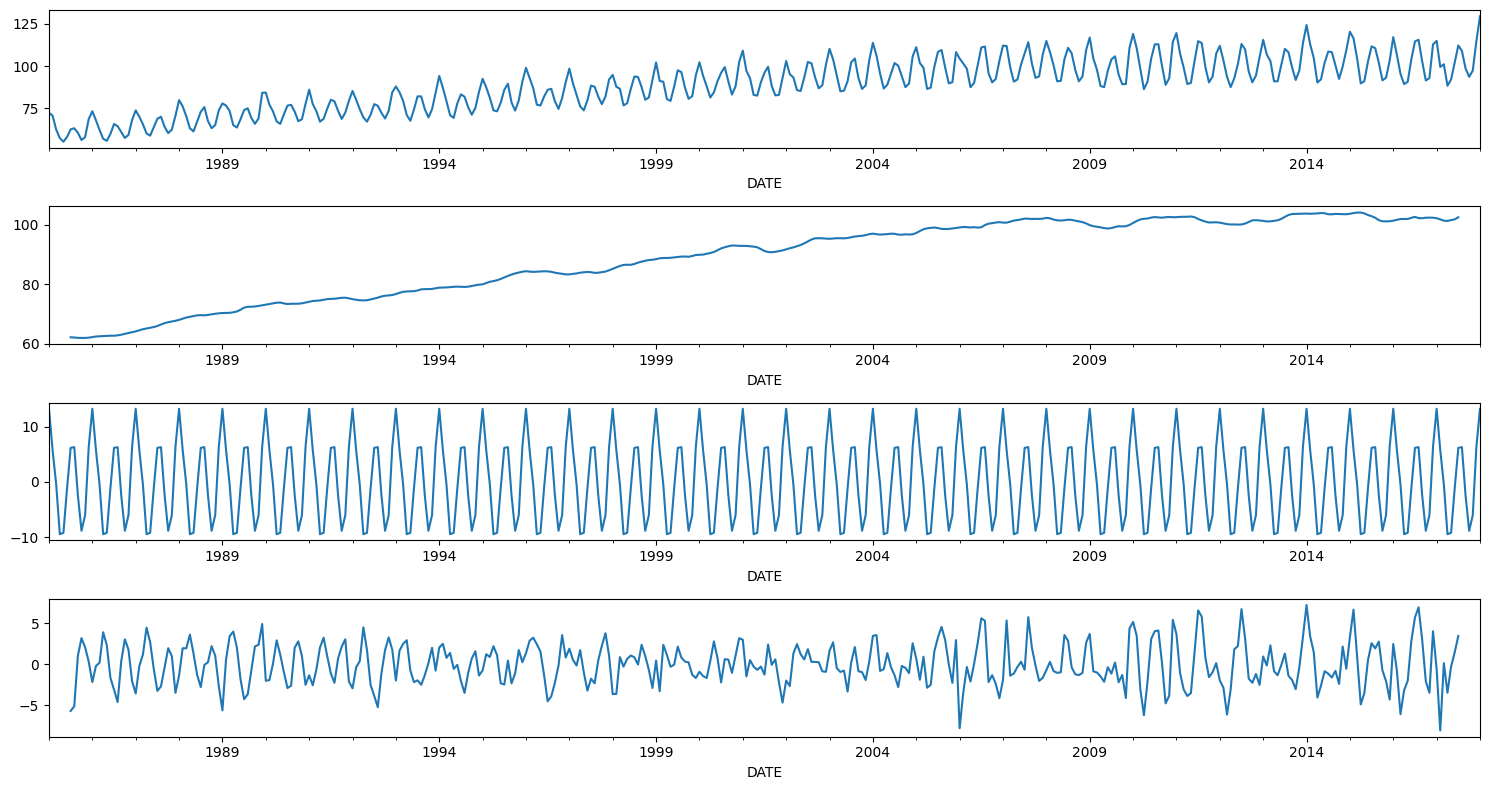

In [7]:
resultados = seasonal_decompose(df)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
sns.set_style('darkgrid')

In [10]:
X = df.Value.values

In [11]:
result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -2.256990350047235
P-Value: 0.1862146911658712
Valores críticos:
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


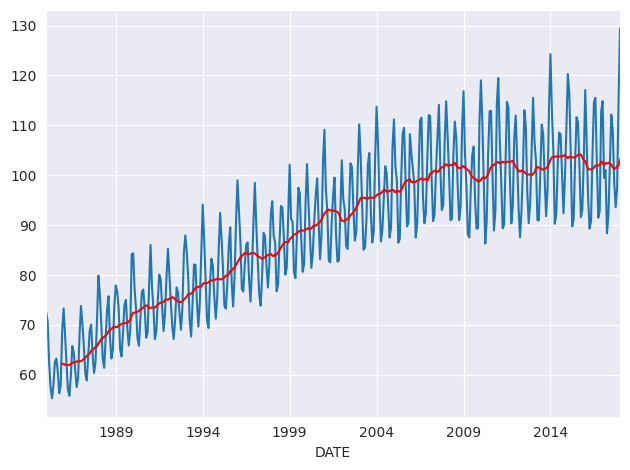

In [12]:
ma = df.rolling(12).mean()

f, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

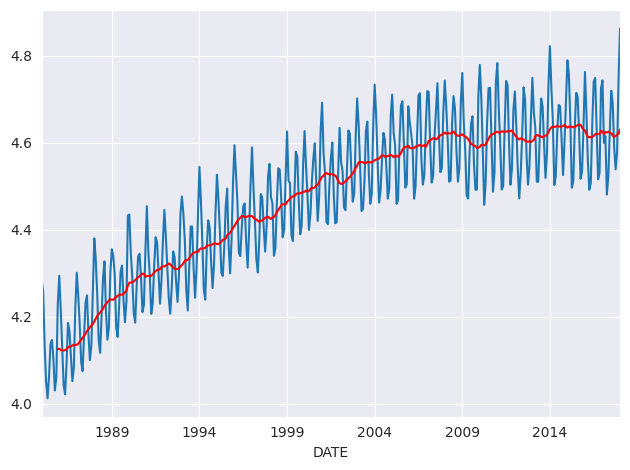

In [13]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

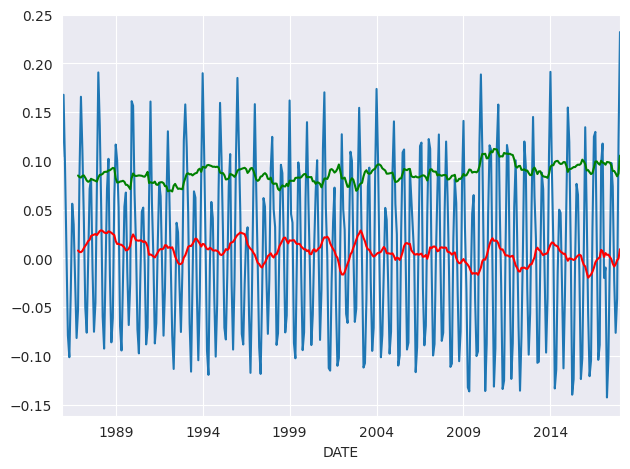

In [14]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

In [15]:
X_s = df_s.Value.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -5.2115861853654355
P-Value: 8.32563975994627e-06
Valores críticos:
	1%: -3.448147967010838
	5%: -2.8693833397824413
	10%: -2.5709483564645725


Teste ADF
Teste Estatístico: -5.2115861853654355
P-Value: 8.32563975994627e-06
Valores críticos:
	1%: -3.448147967010838
	5%: -2.8693833397824413
	10%: -2.5709483564645725


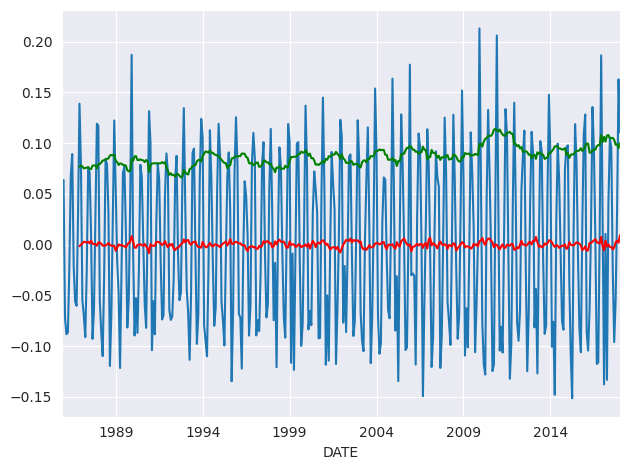

In [16]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()

std_diff = df_diff.rolling(12).std()

f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

X_diff = df_s.Value.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

In [6]:
# ARIMA - AR: Autoregressivo, I: Integrado, MA: Moving Average

# A(x, y, z) -> ACF, PACF

In [17]:
# nlags -> Números de Meses

lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

In [18]:
# 5% ACF

# 1.96/sqrt(N-d) -> N: número de pontos do df e d é o número de vezes que nós dividimos


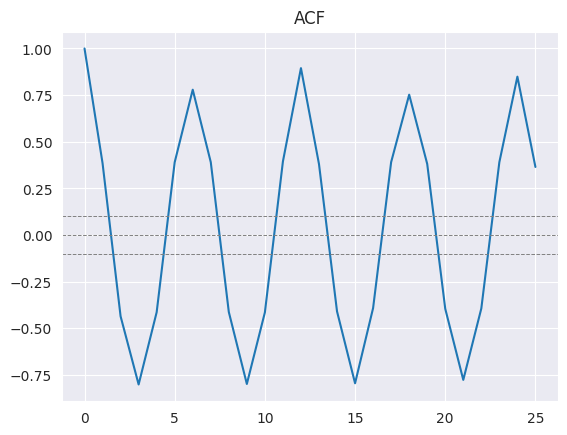

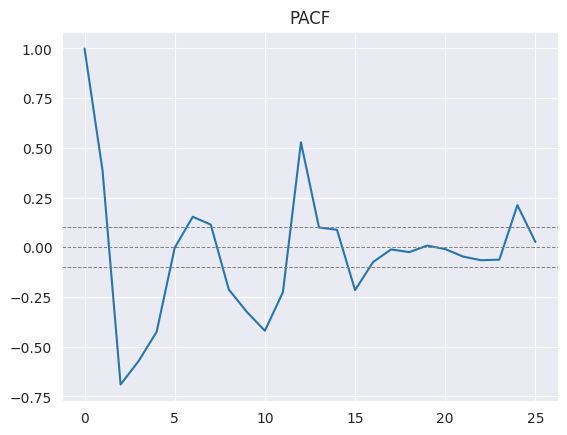

In [19]:
plt.plot(lag_acf)

plt.axhline(y = -1.96/(np.sqrt(len(df_diff) - 1)), linestyle = '--', color = 'gray', linewidth = 0.7)

plt.axhline(y = 0, linestyle = '--', color = 'gray', linewidth = 0.7)

plt.axhline(y = 1.96/(np.sqrt(len(df_diff) - 1)), linestyle = '--', color = 'gray', linewidth = 0.7)

plt.title('ACF')
plt.show()

plt.plot(lag_pacf)

plt.axhline(y = -1.96/(np.sqrt(len(df_diff) - 1)), linestyle = '--', color = 'gray', linewidth = 0.7)

plt.axhline(y = 0, linestyle = '--', color = 'gray', linewidth = 0.7)

plt.axhline(y = 1.96/(np.sqrt(len(df_diff) - 1)), linestyle = '--', color = 'gray', linewidth = 0.7)

plt.title('PACF')
plt.show()

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

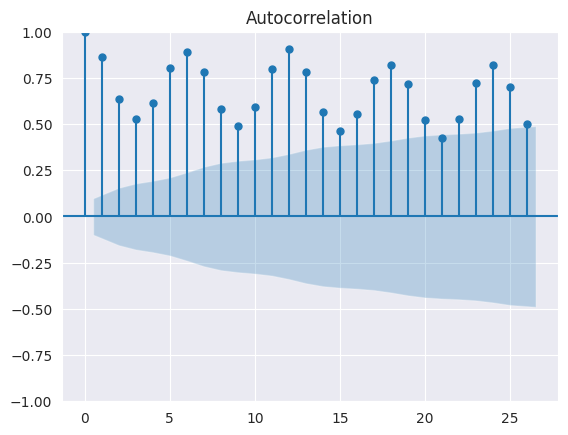

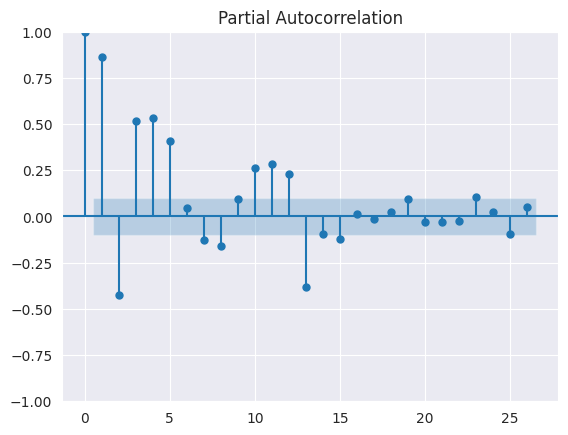

In [21]:
plot_acf(df.Value)
plot_pacf(df.Value)
plt.show()